In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib.gridspec import GridSpec

In [3]:
results = pd.read_excel('Results and Tracks.xlsx', sheet_name='Results')
trackData = pd.read_excel('Results and Tracks.xlsx', sheet_name='Tracks', index_col = 'Track')

In [40]:
results['Positions Gained'] = results['Start'] - results['Finishing Position']
results['Pole'] = results['Start'] == 1
results['Win'] = results['Finishing Position'] == 1
results.groupby('Driver')['Positions Gained'].mean().to_frame().sort_values('Positions Gained', ascending=False)
drivers = results.groupby('Driver').agg({'Race': 'count', 'Pole': 'sum', 'Win': 'sum', 'Points': 'sum', 'Positions Gained': ['mean', 'median'], 'Start': ['min', 'mean', 'median'], 'Finishing Position': ['min', 'mean', 'median']}).sort_values(('Points', 'sum'), ascending=False)
drivers

Race  Pole   Win Points Positions Gained        Start  \
                  count   sum   sum    sum             mean median   min   
Driver                                                                     
Scott Dixon         183  12.0  28.0   6128        -0.158470    1.0     1   
Will Power          182  54.0  35.0   5901        -3.967033   -2.0     1   
Ryan Hunter-Reay    183   6.0  15.0   4885        -1.060109    0.0     1   
Simon Pagenaud      152  14.0  15.0   4635         1.131579    1.0     1   
Josef Newgarden     148  12.0  18.0   4251        -0.648649    0.0     1   
...                 ...   ...   ...    ...              ...    ...   ...   
Ho-Pin Tung           1   0.0   0.0     10        -3.000000   -3.0    24   
Dillon Battistini     1   0.0   0.0     10        -3.000000   -3.0    25   
Lucas Luhr            1   0.0   0.0      8         2.000000    2.0    24   
Franck Montagny       1   0.0   0.0      8        -1.000000   -1.0    21   
Scott McLaughlin      1   0.0   0.0      8        -1.000000   -1.0    21   

                                    Finishing Position                    
                        mean median                min       mean median  
Driver                                                                    
Scott Dixon         7.016393    6.0                  1   7.174863    5.0  
Will Power          4.681319    3.0                  1   8.648352    6.0  
Ryan Hunter-Reay    9.513661    8.0                  1  10.573770    9.0  
Simon Pagenaud      9.302632    8.0                  1   8.171053    6.0  
Josef Newgarden     9.391892    8.0                  1  10.040541    8.0  
...                      ...    ...                ...        ...    ...  
Ho-Pin Tung        24.000000   24.0                 27  27.000000   27.0  
Dillon Battistini  25.000000   25.0                 28  28.000000   28.0  
Lucas Luhr         24.000000   24.0                 22  22.000000   22.0  
Franck Montagny    21.000000   21.0                 22  22.000000   22.0  
Scott McLaughlin   21.000000   21.0                 22  22.000000   22.0  

[110 rows x 12 columns]

In [41]:
pointRiskProfile = results.groupby('Driver').agg({'Points': ['mean', 'std', 'median']})
pointRiskProfile.columns = pointRiskProfile.columns.droplevel(0)
pointRiskProfile = pointRiskProfile.rename(columns={'mean': 'Average Points', 'std': 'Std Points', 'median': 'Median Points'})
    
driversToKeep = list(drivers[drivers[('Race','count')] >= 10].index)
pointRiskProfile = pointRiskProfile.loc[driversToKeep, :].reset_index()

pointRiskProfile['Standard Score'] = pointRiskProfile['Average Points'] - pointRiskProfile['Std Points']
pointRiskProfile['High Risk Score'] = pointRiskProfile['Average Points'] - 0.5 * pointRiskProfile['Std Points']
pointRiskProfile['Low Risk Score'] = pointRiskProfile['Average Points'] - 1.5 * pointRiskProfile['Std Points']

pointRiskProfile.sort_values('Standard Score', ascending=False)

,Driver,Average Points,Std Points,Median Points,Standard Score,High Risk Score,Low Risk Score
0,Scott Dixon,33.486339,16.528317,31.0,16.958022,25.222180,8.693864
15,Dario Franchitti,29.194030,12.943044,30.0,16.250986,22.722508,9.779464
47,Robert Wickens,27.928571,12.002976,30.0,15.925596,21.927084,9.924108
1,Will Power,32.423077,17.839744,31.5,14.583332,23.503205,5.663460
3,Simon Pagenaud,30.493421,16.834999,28.0,13.658423,22.075922,5.240923
...,...,...,...,...,...,...,...
32,Ed Jones,19.446809,13.807384,17.0,5.639425,12.543117,-1.264267
18,Carlos Munoz,24.123288,18.734212,19.0,5.389076,14.756182,-3.978030
48,Sage Karam,16.521739,11.684759,12.0,4.836980,10.679360,-1.005400
16,Ed Carpenter,21.295455,16.581501,16.0,4.713953,13.004704,-3.576797


In [6]:
positionRiskProfile = results.groupby('Driver').agg({'Finishing Position': ['mean', 'std', 'median']})
positionRiskProfile.columns = positionRiskProfile.columns.droplevel(0)
positionRiskProfile = positionRiskProfile.rename(columns={'mean': 'Average Finish', 'std': 'Std Finish', 'median': 'Median Finish'})
    
driversToKeep = list(drivers[drivers[('Race','count')] >= 10].index)
positionRiskProfile = positionRiskProfile.loc[driversToKeep, :].reset_index()

positionRiskProfile['Standard Score'] = 50 - positionRiskProfile['Average Finish'] + positionRiskProfile['Std Finish']
positionRiskProfile['High Risk Score'] = 50 - positionRiskProfile['Average Finish'] + 0.5 * positionRiskProfile['Std Finish']
positionRiskProfile['Low Risk Score'] = 50 - positionRiskProfile['Average Finish'] + 1.5 * positionRiskProfile['Std Finish']

positionRiskProfile.sort_values('Standard Score', ascending=False)

,Driver,Average Finish,Std Finish,Median Finish,Standard Score,High Risk Score,Low Risk Score
0,Scott Dixon,7.174863,6.657395,5.0,49.482531,46.153834,52.811229
15,Dario Franchitti,7.761194,7.060538,5.0,49.299344,45.769075,52.829613
1,Will Power,8.648352,7.620666,6.0,48.972315,45.161982,52.782648
47,Robert Wickens,8.928571,7.269158,5.5,48.340587,44.706008,51.975166
19,Juan Pablo Montoya,9.115385,7.028385,7.0,47.913000,44.398808,51.427192
...,...,...,...,...,...,...,...
67,Katherine Legge,20.000000,5.347897,22.0,35.347897,32.673948,38.021845
49,Ana Beatriz,19.206897,4.394634,20.0,35.187737,32.990420,37.385054
66,Mario Romancini,19.181818,4.069845,22.0,34.888027,32.853104,36.922949
57,Pippa Mann,20.388889,4.888629,21.0,34.499740,32.055426,36.944055


In [21]:
def driverPerformance(ax, summaryStat='mean', driver = '', n = 25, annot=True):
    allDrivers = drivers.reset_index()
    if summaryStat not in ('mean', 'median'):
        return np.NaN
    
    summaryLabel = 'Average' if summaryStat == 'mean' else 'Median'
    
    if driver == '':
        ax.set_title('%s Start Vs %s Positions Gained for Top Drivers \n n=%s' % (summaryStat, summaryStat, n))
        data = allDrivers.sort_values(('Points','sum'), ascending=False).head(n)
        sb.scatterplot(data=data, x=('Start', summaryStat), y=('Positions Gained', summaryStat), hue='Driver', legend='full', ax=ax)
    else:
        ax.set_title('%s Start Vs %s Positions Gained for %s' % (summaryLabel, summaryLabel, driver))
        data = allDrivers[allDrivers['Driver'] == driver]
        sb.scatterplot(data=data, x=('Start', summaryStat), y=('Positions Gained', summaryStat), ax=ax, s=150)

    ax.set_xlabel('%s Starting Position' % summaryLabel)
    ax.set_ylabel('%s Positions Gained' % summaryLabel)
    
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    if annot:
        for i in data.index:
            ax.annotate(data['Driver'][i], (data[('Start', summaryStat)][i] + .05, data[('Positions Gained', summaryStat)][i]))


def driverPointsLineSummary(ax, driver, years=[]):
    mask1 = results['Driver'] == driver
    specDF = results[mask1].loc[:, ['Driver', 'Year', 'Race Number', 'Race', 'Points']]
    
    if len(years) > 0:
        specDF = specDF[specDF.apply(lambda x: x['Year'] in years, axis=1)]
    
    specDF['Running Points'] = specDF.groupby('Year')['Points'].cumsum()
    sb.lineplot(data=specDF, x='Race Number', y='Running Points', hue='Year', palette='colorblind', ax=ax)
    ax.set_title('%s Points Summary By Year' % driver)
    
    
def driverPointsBarSummary(ax, driver, years=[]):
    mask1 = results['Driver'] == driver
    specDF = results[mask1].loc[:, ['Driver', 'Year', 'Race Number', 'Race', 'Points']]
    
    if len(years) > 0:
        specDF = specDF[specDF.apply(lambda x: x['Year'] in years, axis=1)]
    
    specDF['Running Points'] = specDF.groupby('Year')['Points'].cumsum()
    sb.barplot(data=specDF, x='Race Number', y='Running Points', hue='Year', palette='colorblind', ax=ax)
    ax.set_title('%s Points Summary By Year' % driver)
    
    
    
def driverBoxPlot(ax, driver, years=[]):
    data = results[results['Driver'] == driver]
    if len(years) > 0:
        data = data[data.apply(lambda row: row['Year'] in years, axis=1)]
    sb.boxplot(data = data, x='Year', y='Finishing Position', whis=[0, 100], ax=ax)
    sb.stripplot(data = data, x='Year', y='Finishing Position', color='black', linewidth=0, ax=ax)
    ax.set_title('Finishing Position Box Plot for %s' % driver)
    
    
def driverResultsVsConsistencyScatter(ax, driver= '', n= 25, typ = 'Points', summaryStat='mean', annot=True):
    if typ not in ('Points', 'Finish'):
        return np.NaN
    if summaryStat not in ('mean', 'median'):
        return np.NaN
    
    summaryLabel = 'Average' if summaryStat == 'mean' else 'Median'
    
    if typ == 'Points':
        data = pointRiskProfile.sort_values('Standard Score', ascending=False)    
    elif typ == 'Finish':
        data = positionRiskProfile.sort_values('Standard Score', ascending=False)
        
    if driver == '' and n > 0:
        data = data.head(n)
        sb.scatterplot(data=data, x='Std %s' % typ, y='%s %s' % (summaryLabel, typ), hue='Driver', legend='full', ax=ax)
        ax.set_title('%s %s Vs Deviation in %s for Top Drivers \n n=%s' % (summaryLabel, typ, typ, n))
    else:
        data = data[data['Driver'] == driver]
        sb.scatterplot(data=data, x='Std %s' % typ, y='%s %s' % (summaryLabel, typ), hue='Driver', legend=False, s=150, ax=ax)
        ax.set_title('%s %s Vs Deviation in %s for %s' % (summaryLabel, typ, typ, driver))
    
    maxXPlot = max(data['Average %s' % typ])
    ax.plot([0, maxXPlot], [0, maxXPlot], color='black', linestyle='--')
    
    ax.set_xlabel('Std %s' % typ)
    ax.set_ylabel('%s %s' % (summaryLabel, typ))
    
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    
    if annot:
        for i in data.index:
            ax.annotate(data['Driver'][i], (data['Std %s' % typ][i] + .05, data['%s %s' % (summaryLabel, typ)][i]))
            
            
def yearBoxPlot(ax, years=[], annot=True):
    data = results.groupby(['Year', 'Driver'])['Points'].sum().reset_index(['Year', 'Driver'])
    if len(years) > 0:
        data = data[data.apply(lambda row: row['Year'] in years, axis=1)]
    sb.boxplot(data = data, x='Year', y='Points', whis=[0, 100], ax=ax)
    sb.stripplot(data = data, x='Year', y='Points', color='black', linewidth=0, ax=ax)
    ax.set_title('Finishing Points Box Plot by Year')

    if annot:
        years = data['Year'].unique()
        yearWinners = {}
        for year in years:
            winnerRow = data[data['Year'] == year].sort_values('Points', ascending=False).head(1)
            yearWinners[year] = [winnerRow.iloc[0, 1], winnerRow.iloc[0, 2]]

        for i, year in enumerate(years):
            ax.annotate('%s: %s' % (yearWinners[year][0], yearWinners[year][1]), (i - .5, yearWinners[year][1] + 10))
            
            
def driverNumbersByYear(ax, years=[]):
    data = results.groupby(['Year', 'Race Number'])['Driver'].nunique().to_frame().reset_index().rename(columns={'Driver': 'Drivers'})
    if len(years) > 0:
        data = data[data.apply(lambda row: row['Year'] in years, axis=1)]
    sb.barplot(data = data, x='Race Number', y='Drivers', hue='Year', ax=ax, palette='colorblind')
    ax.set_title('Drivers Per Race By Year')
    
    
def winnersPerDriver(ax, years=[]):
    if len(years) == 0:
        years = list(results['Year'].unique())
    
    data = results[results['Year'].apply(lambda year: year in years)]
    driversPerYear = data.groupby('Year')['Driver'].nunique().to_frame().rename(columns={'Driver':'Drivers'})
    driversPerYear['Winners'] = data[data['Win']].groupby('Year')['Driver'].nunique()
    driversPerYear['Winners Per Driver'] = driversPerYear['Winners'] / driversPerYear['Drivers']
    driversPerYear.reset_index(inplace=True)
    ax.set_xticks(years)

    ax2 = ax.twinx()
    ax.bar(driversPerYear['Year'], driversPerYear['Drivers'], alpha=0.5, color=(1,0,0))
    ax2.plot(driversPerYear['Year'], driversPerYear['Winners Per Driver'], color=(0,0,0))

    ax.set_title('Drivers and Winners Per Driver By Year')
    ax.set_ylabel('Drivers')
    ax2.set_ylabel('Winners Per Driver')
    ax.set_xlabel('Year')

In [28]:
def driverDashboard(driver, summaryStat='mean'):
    fig = plt.figure(figsize=(30, 30))
    gs = GridSpec(4, 2, figure=fig)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1, :])
    ax3 = fig.add_subplot(gs[2, :1])
    ax4 = fig.add_subplot(gs[2, 1:])
    ax5 = fig.add_subplot(gs[3, :1])
    ax6 = fig.add_subplot(gs[3, 1:])
    
    
    driverPointsLineSummary(ax1, driver=driver)
    driverPointsBarSummary(ax2, driver=driver)
    driverBoxPlot(ax3, driver=driver)
    driverPerformance(ax4, driver=driver, summaryStat=summaryStat, annot=False)
    driverResultsVsConsistencyScatter(ax5, driver=driver, summaryStat=summaryStat, typ='Points', annot=False)
    driverResultsVsConsistencyScatter(ax6, driver=driver, summaryStat=summaryStat, typ='Finish', annot=False)
    
    plt.suptitle('%s Dashobard' % driver, fontsize=25)
    plt.savefig('Driver Dashboards/%s-%ss.png' % (driver, summaryStat.capitalize()))

In [29]:
def indyCarDashboard(n=25, summaryStat='mean'):
    fig = plt.figure(figsize=(60, 30))
    gs = GridSpec(3, 4, figure=fig)

    ax1 = fig.add_subplot(gs[0, :3])
    ax2 = fig.add_subplot(gs[1, :3])
    ax3 = fig.add_subplot(gs[2, :3])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[1, 3])
    ax6 = fig.add_subplot(gs[2, 3])

    yearBoxPlot(ax1)
    driverNumbersByYear(ax2)
    winnersPerDriver(ax3)
    driverPerformance(ax4, n=n, summaryStat=summaryStat, annot=True)
    driverResultsVsConsistencyScatter(ax5, summaryStat=summaryStat, typ='Points', n=n, annot=True)
    driverResultsVsConsistencyScatter(ax6, summaryStat=summaryStat, typ='Finish', n=n, annot=False)
    
    plt.suptitle('Series Dashobard and Details For Top %s Drivers' % n, fontsize = 25)
    plt.savefig('Series Dashboards/Series Dashboard N%s-%ss.png' % (n, summaryStat.capitalize()))

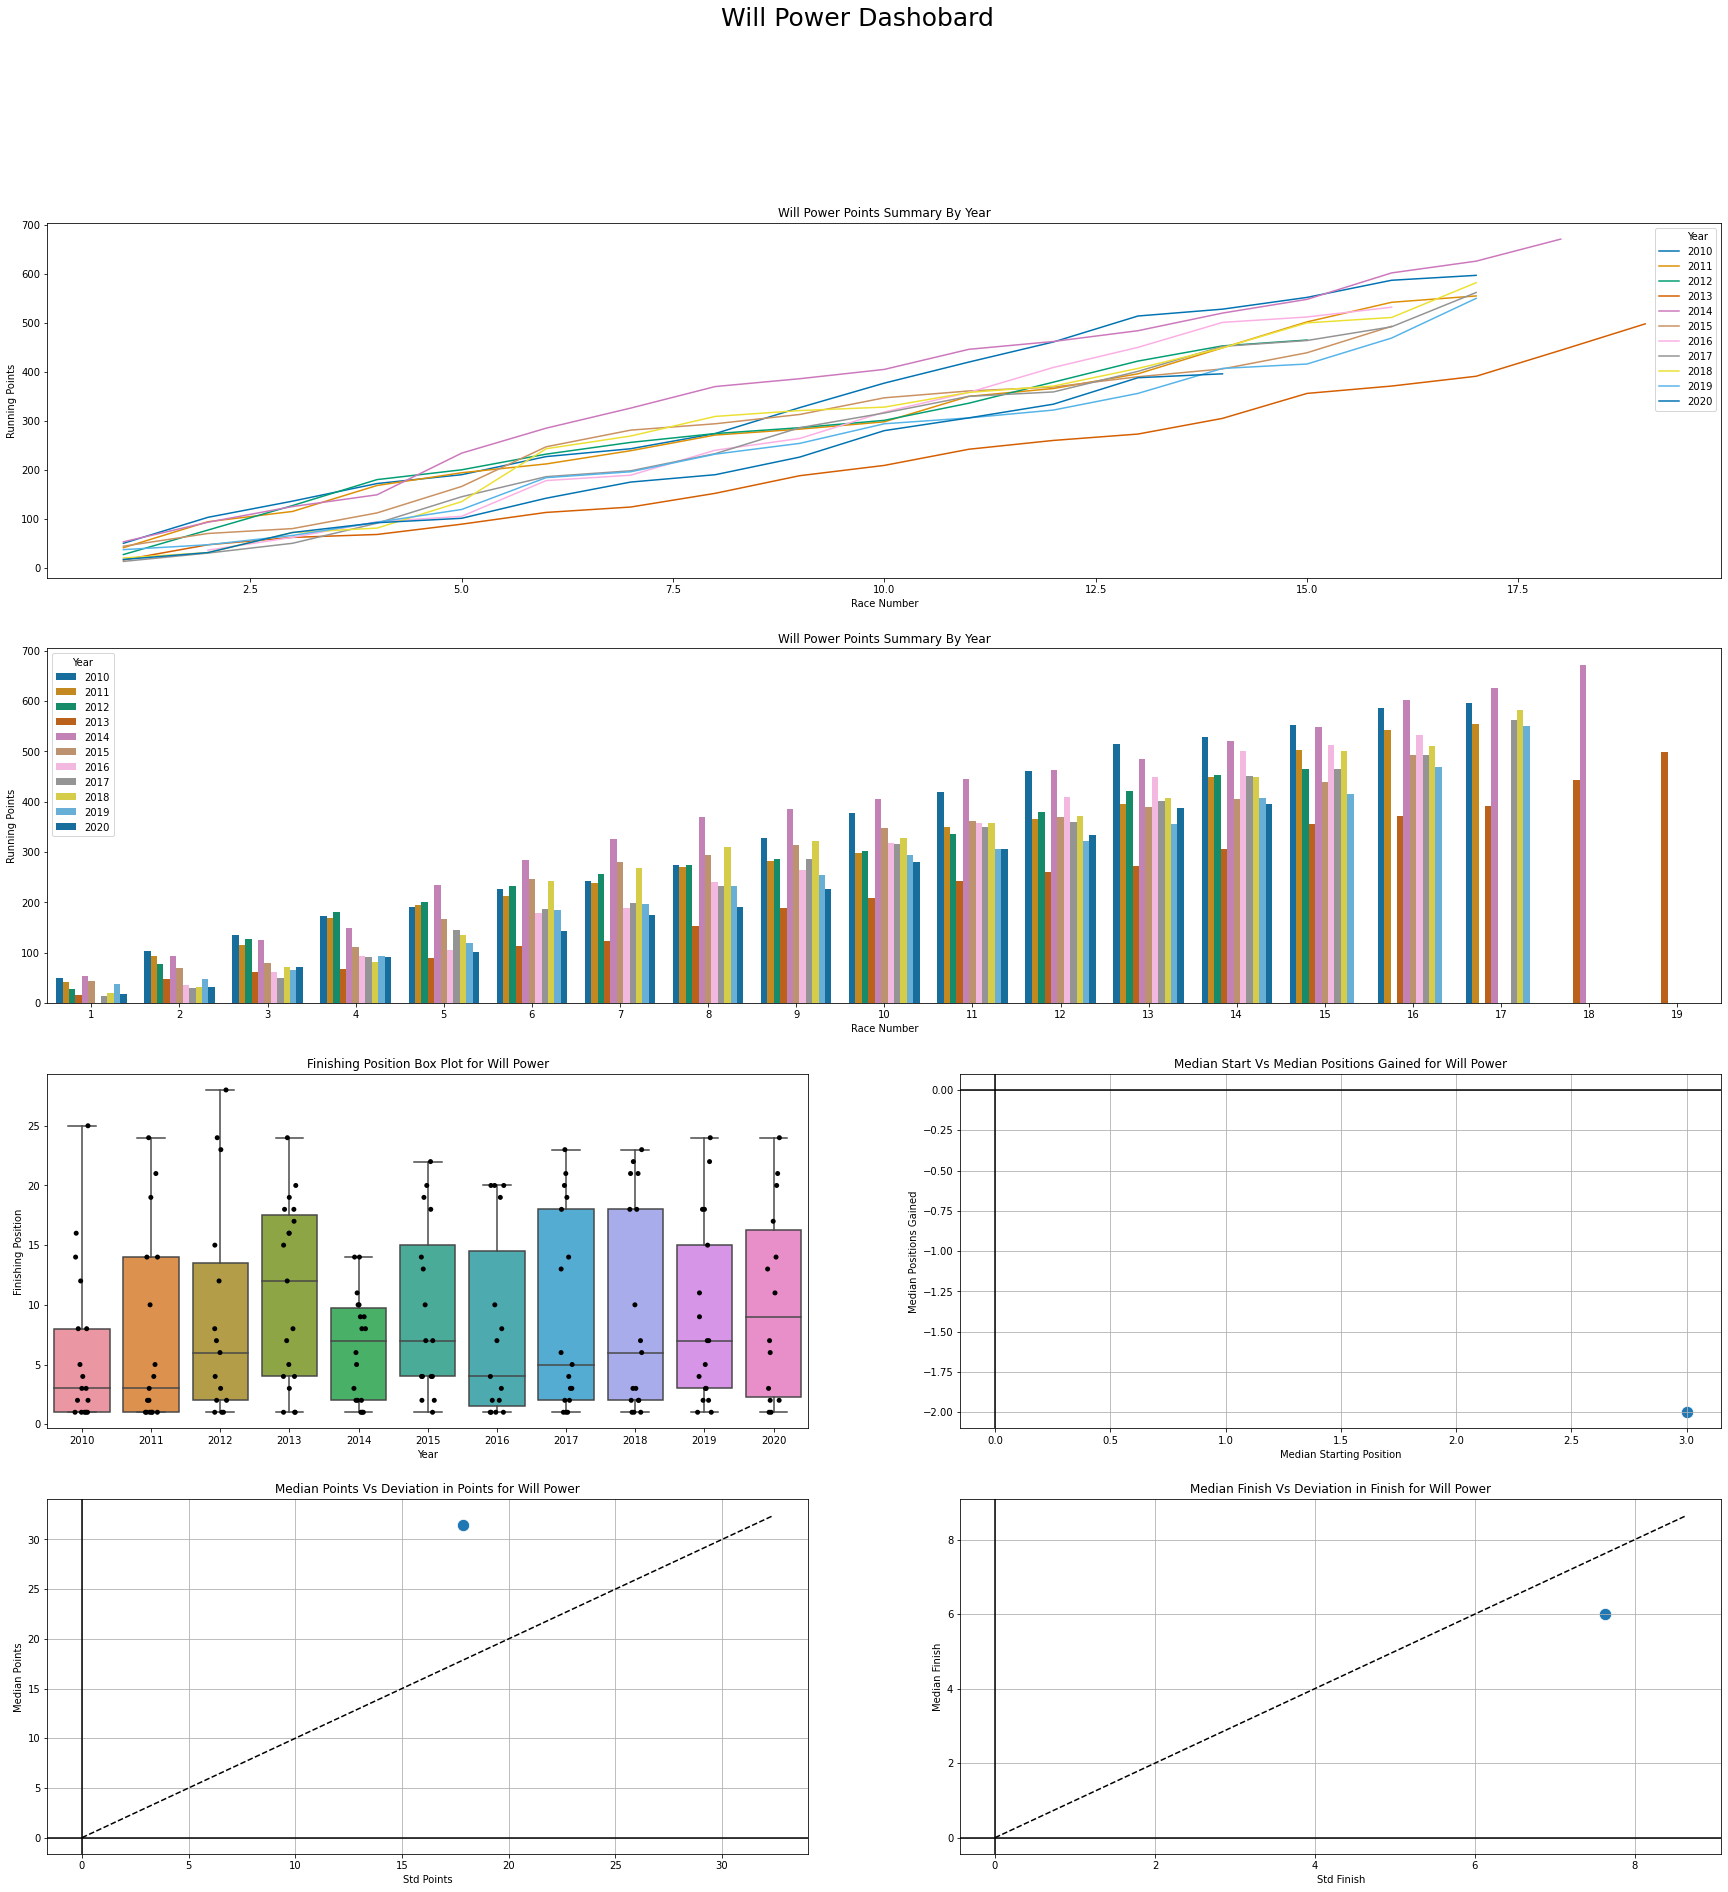

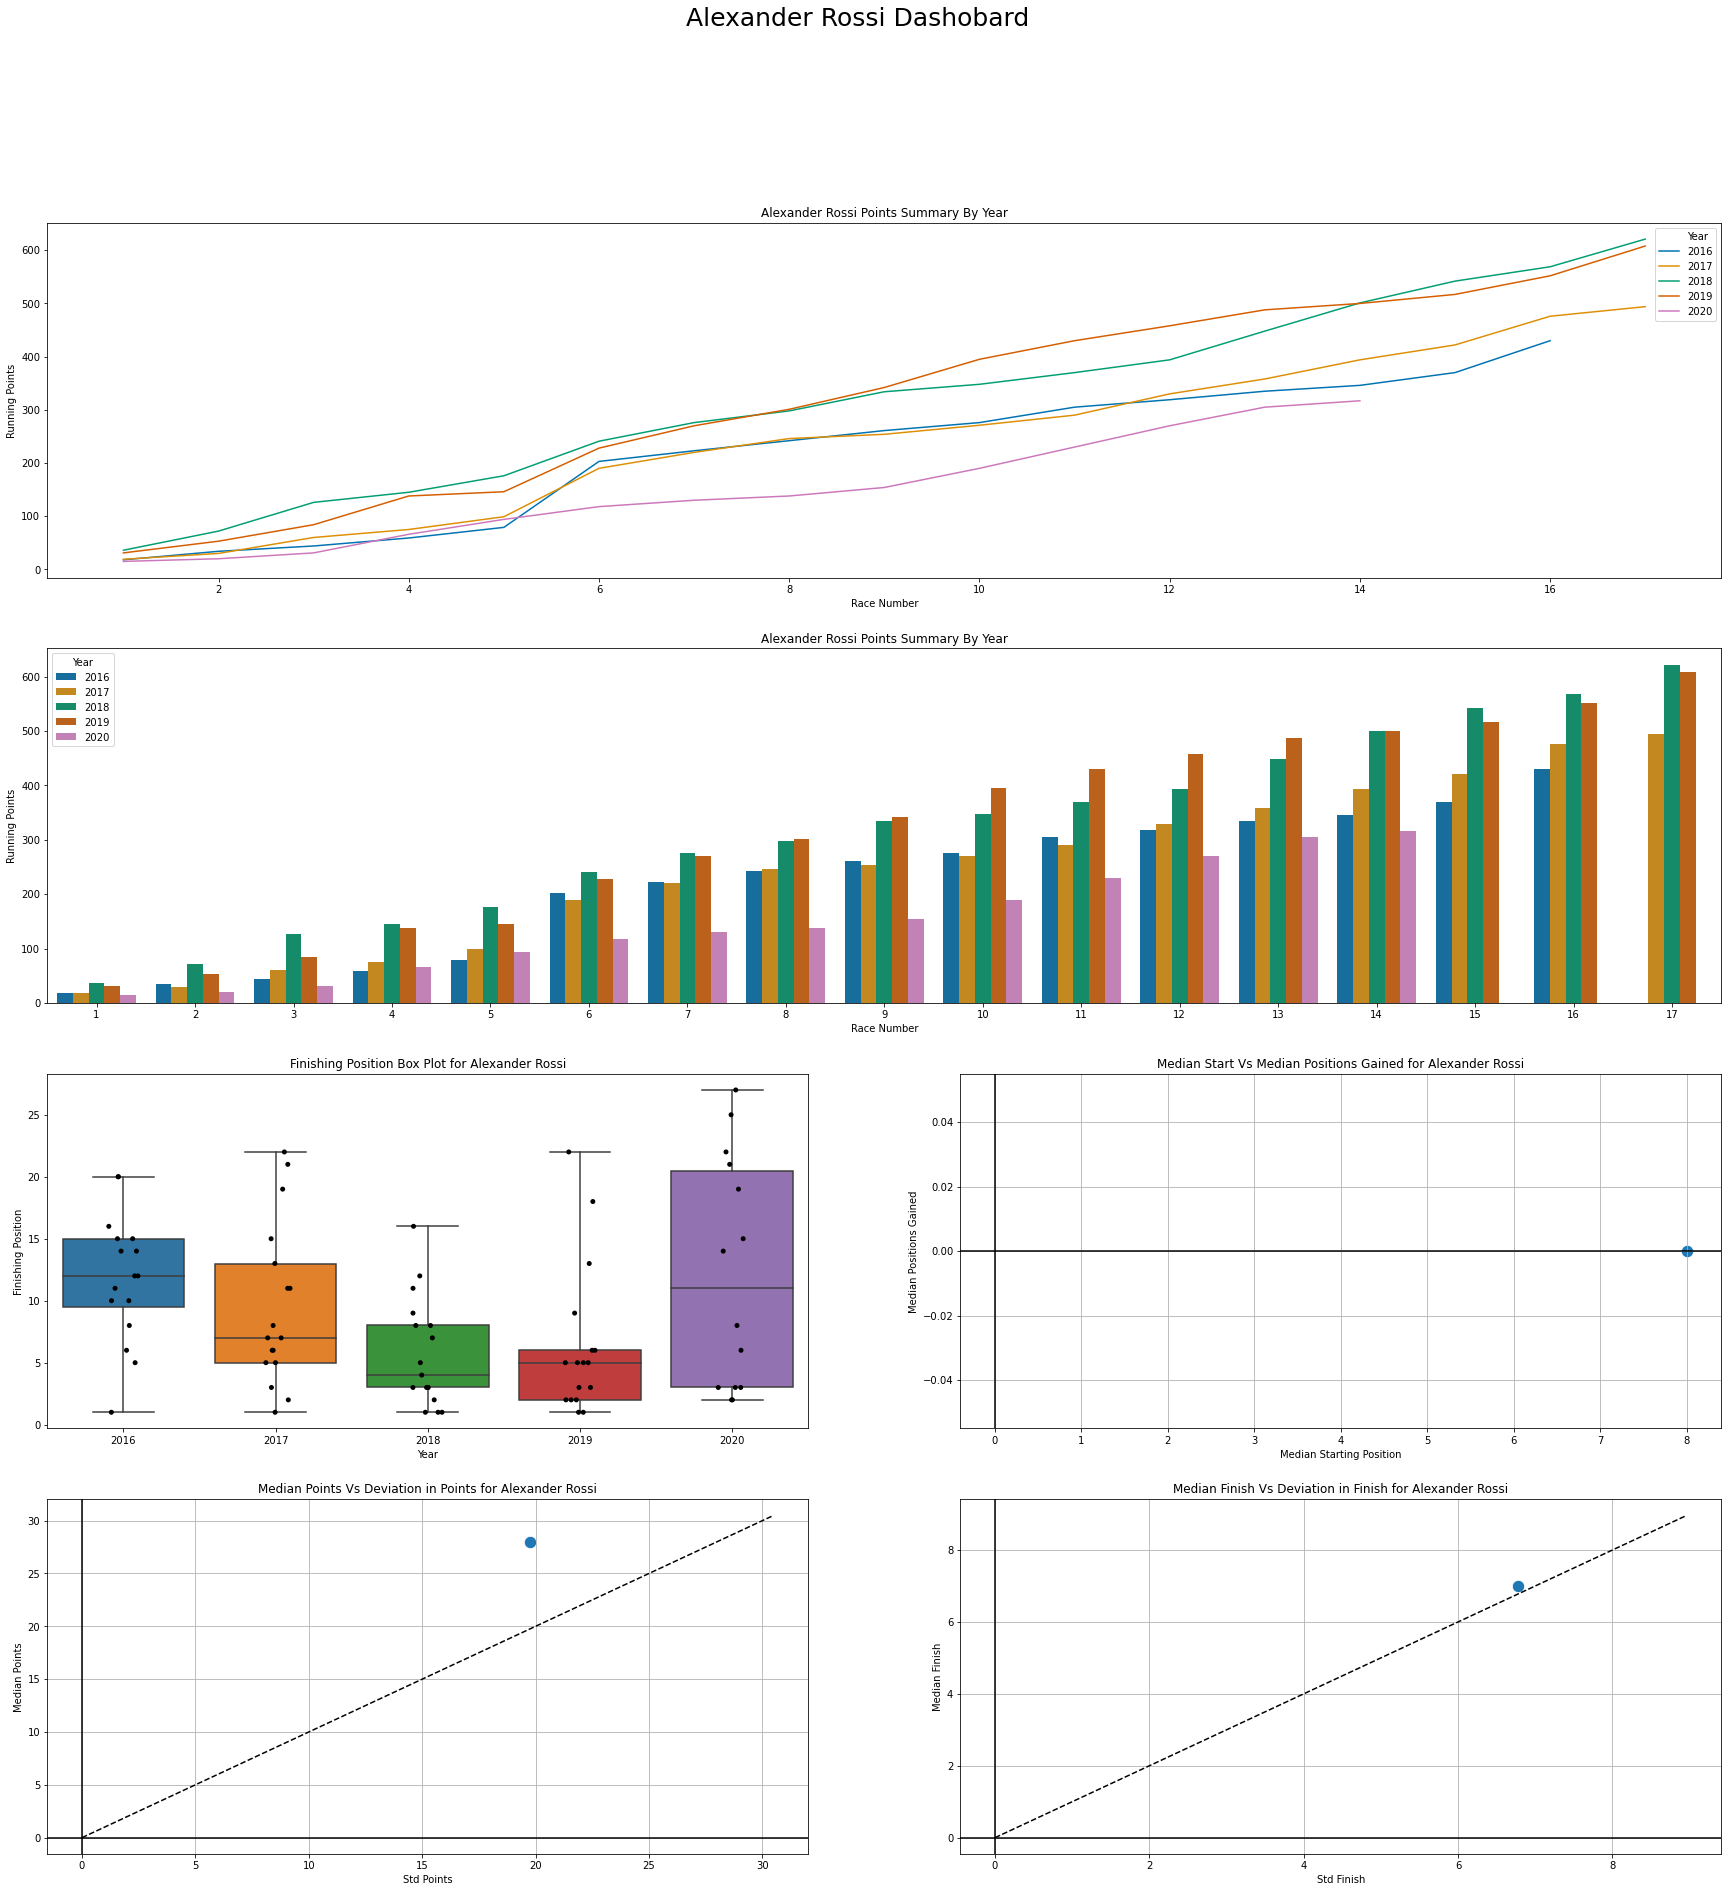

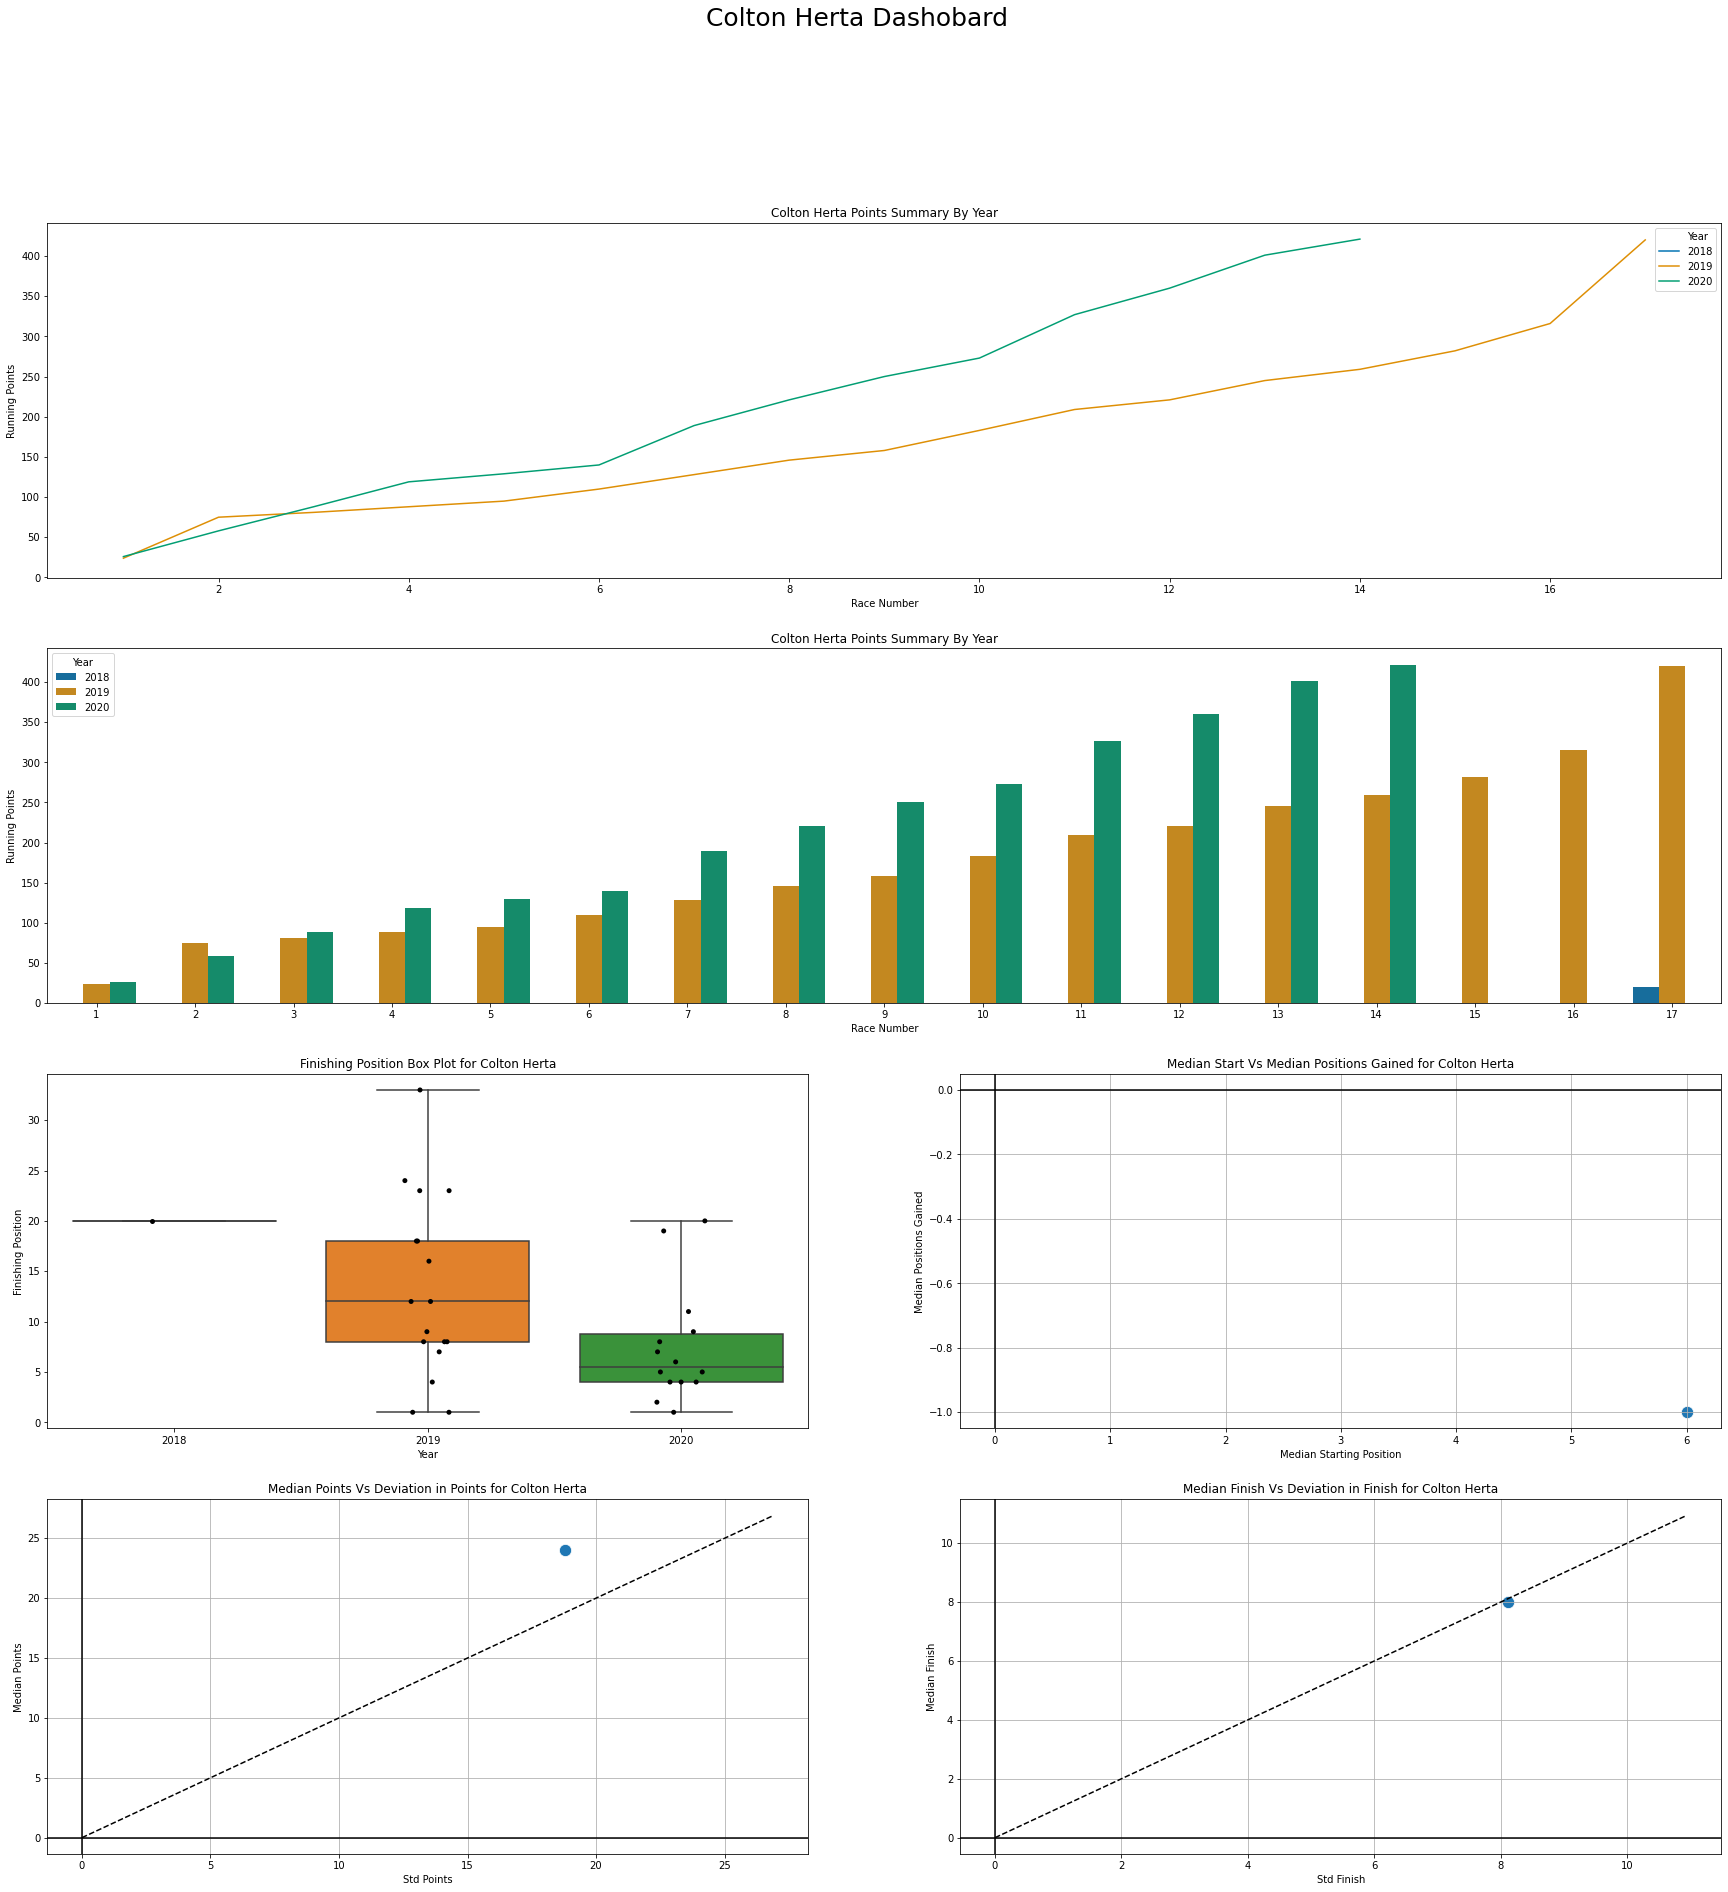

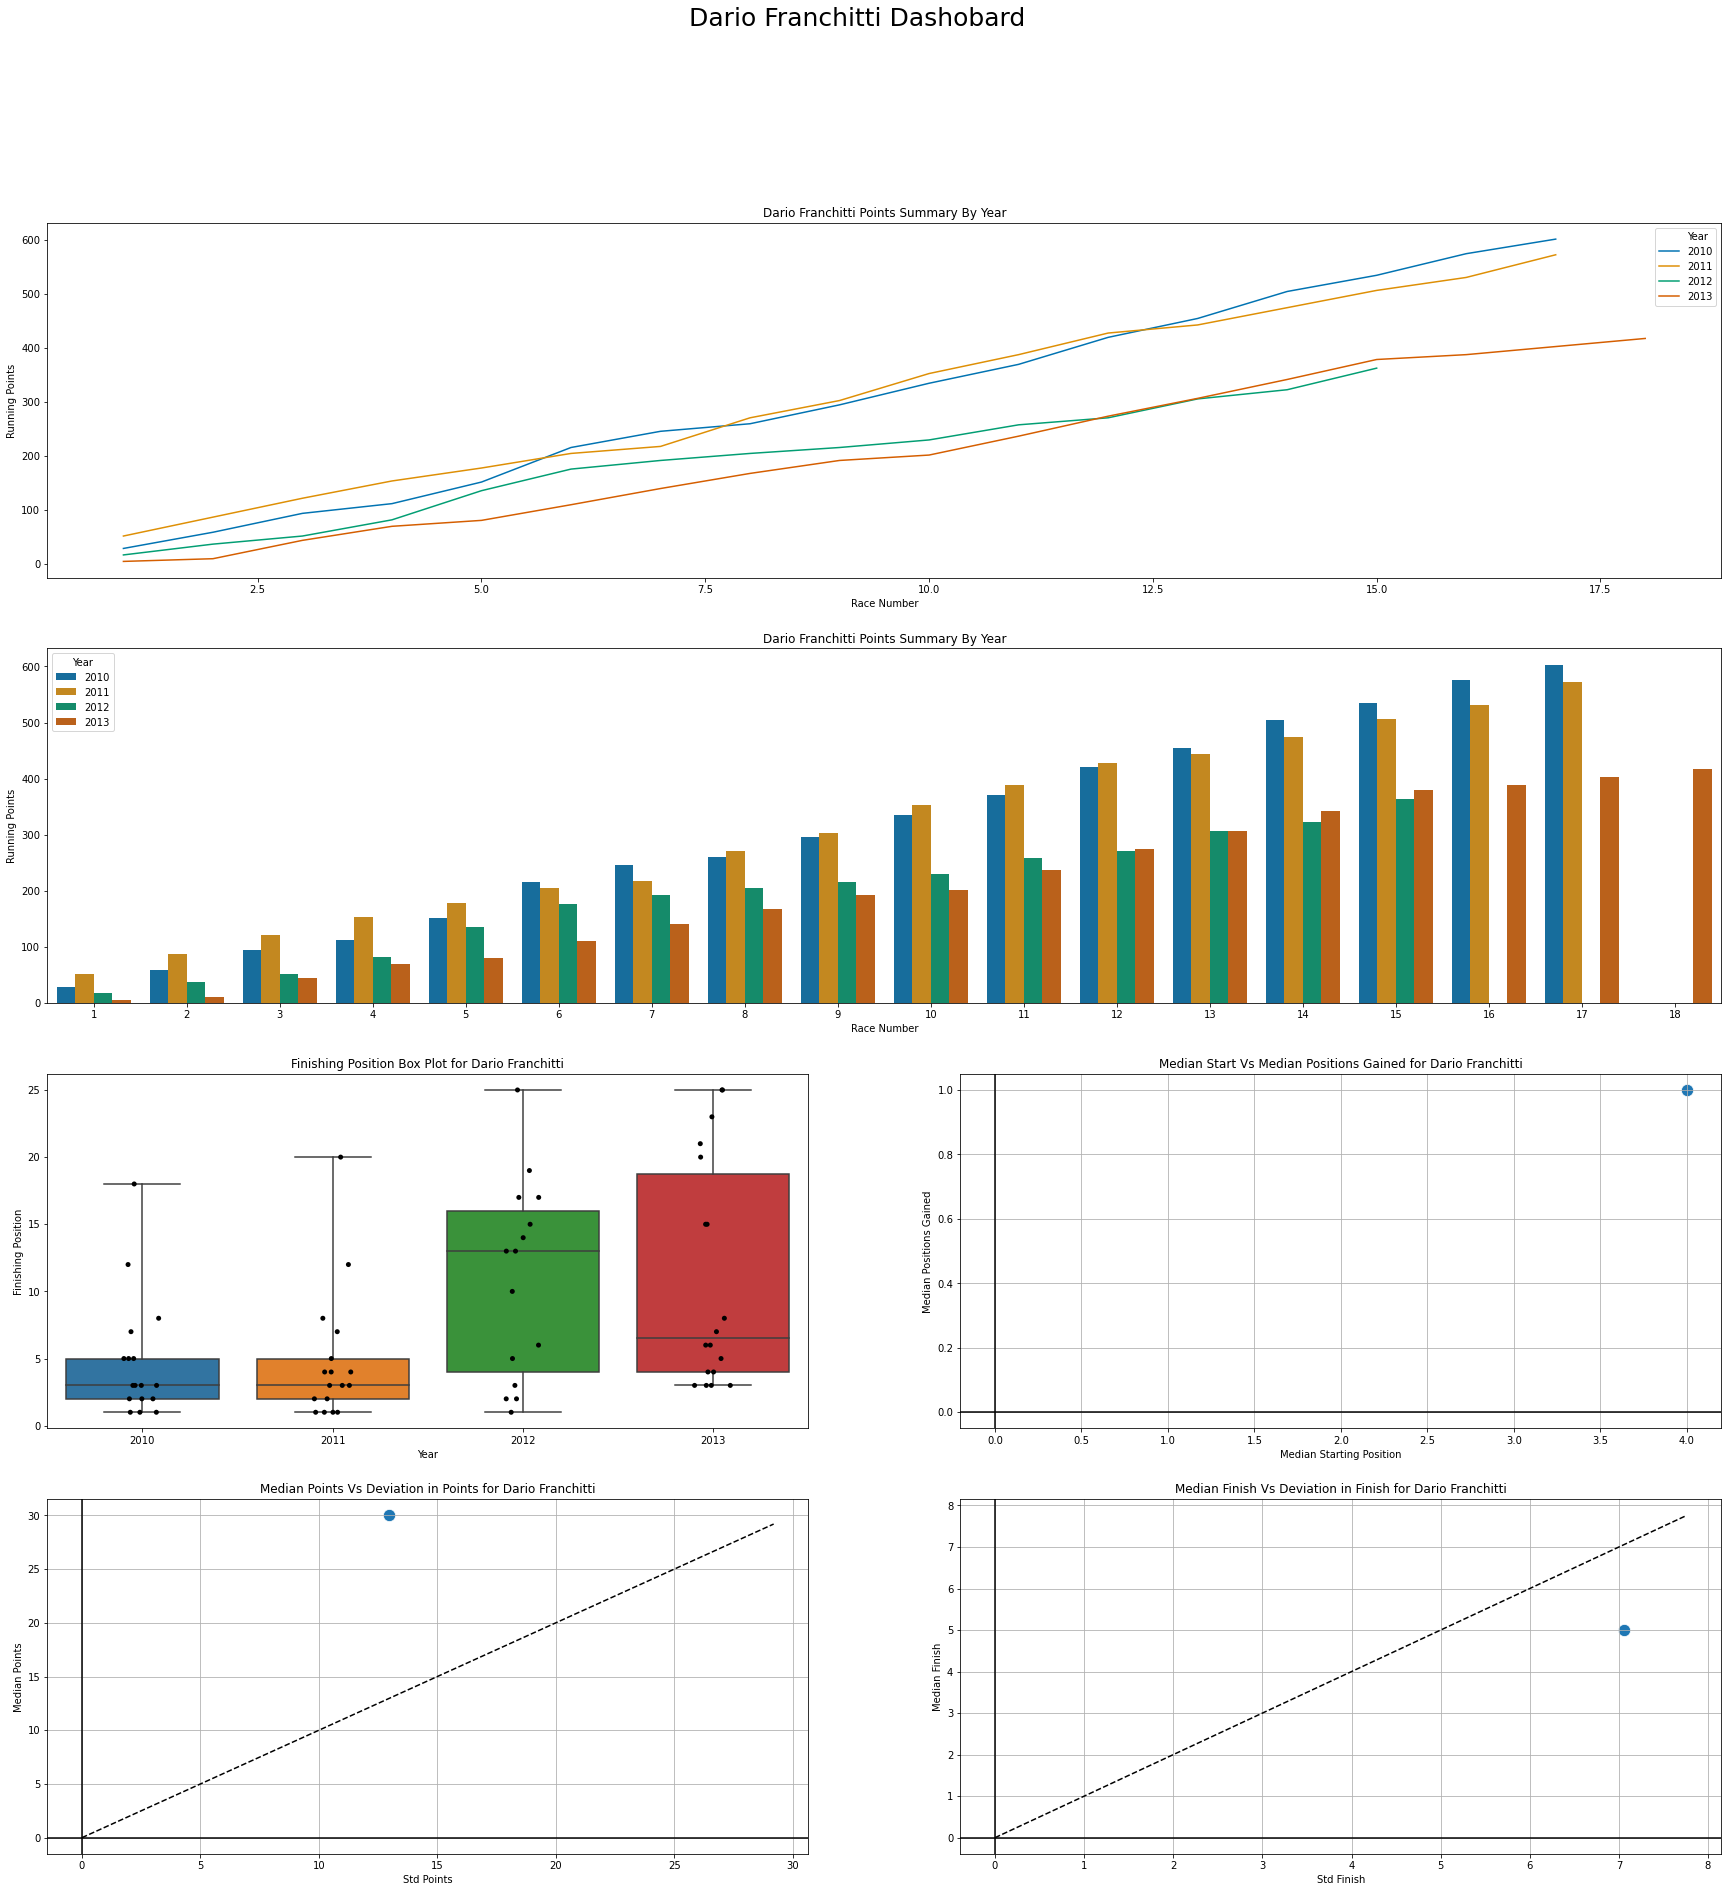

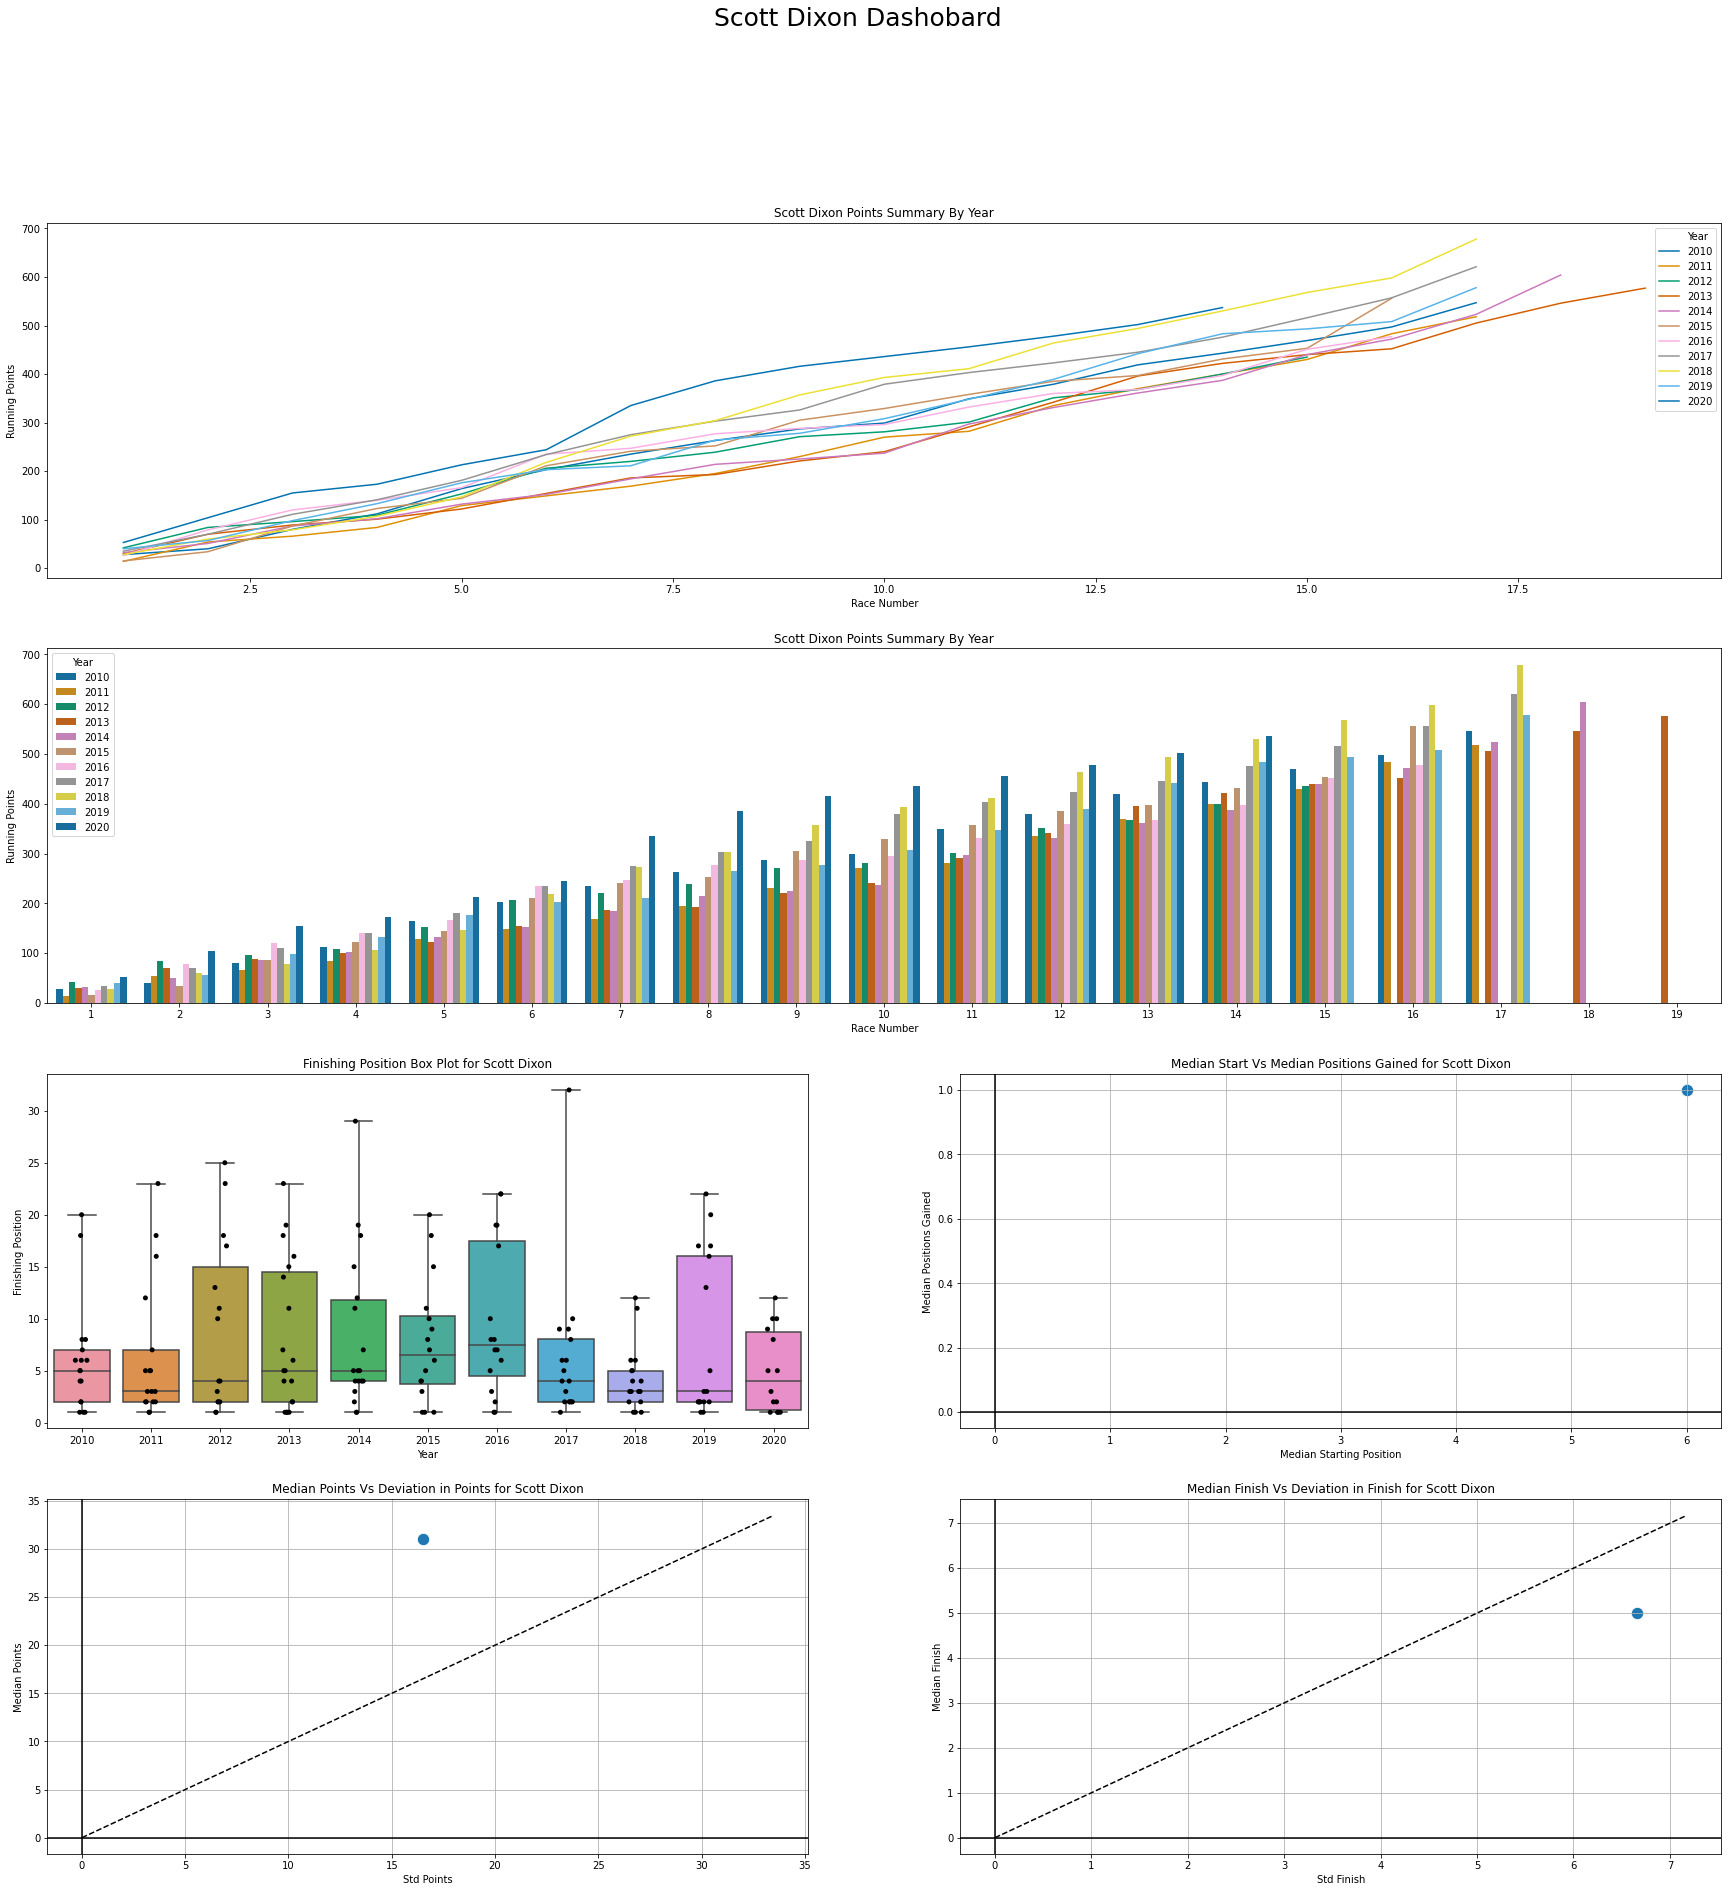

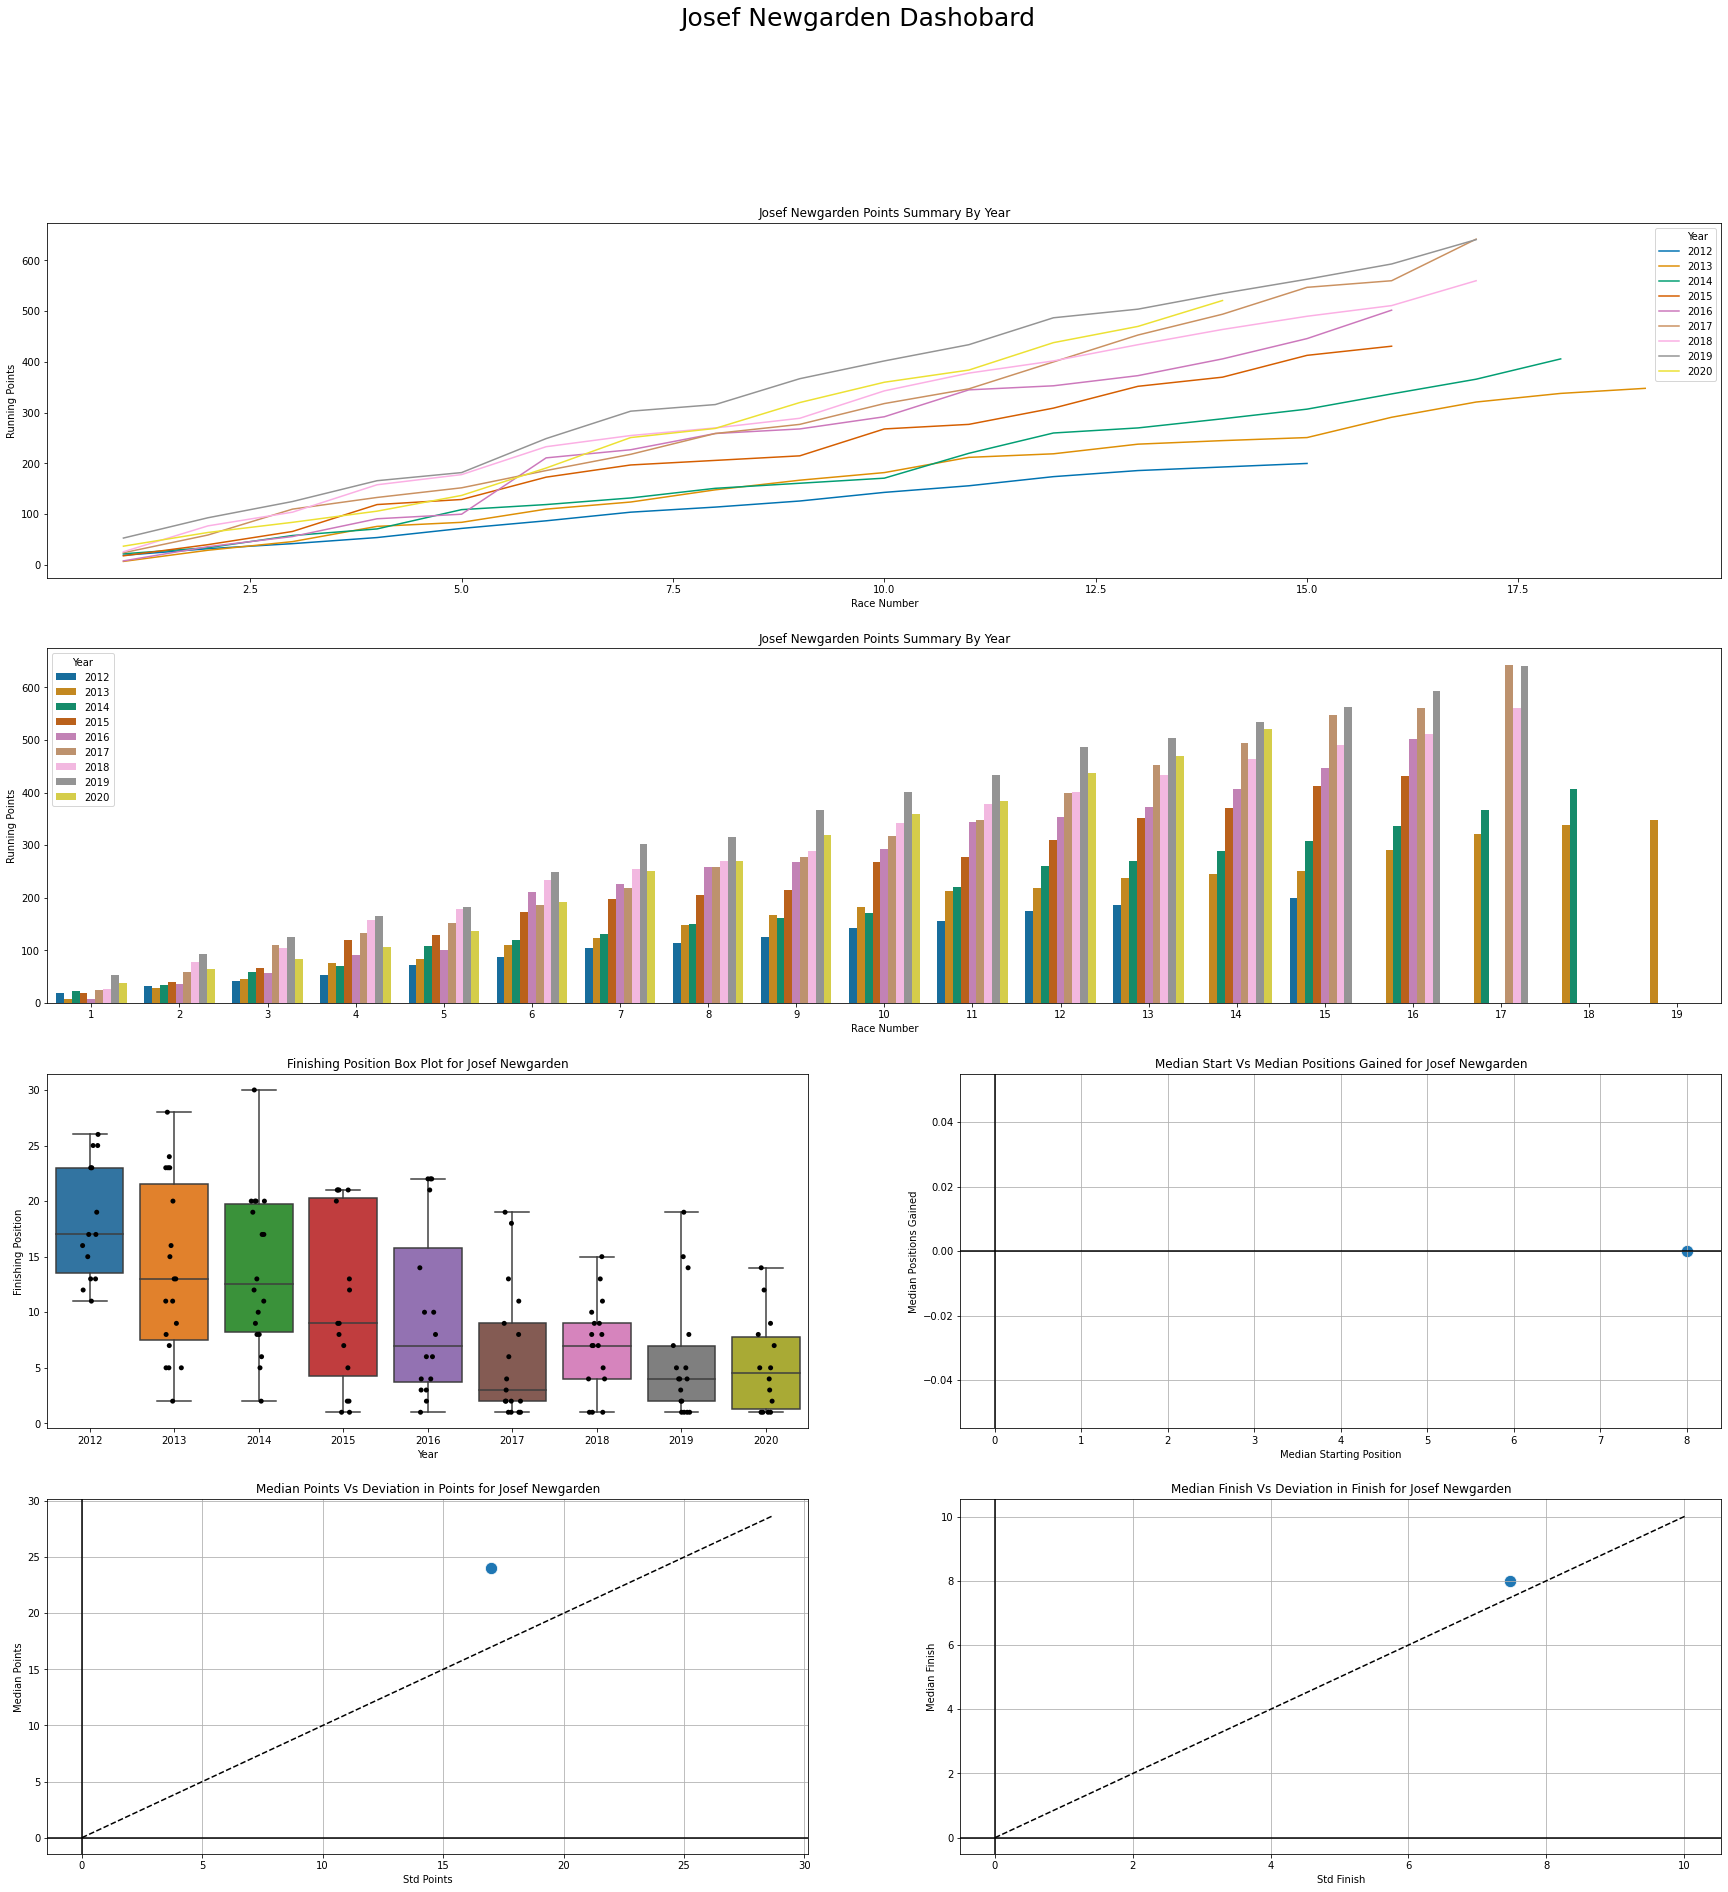

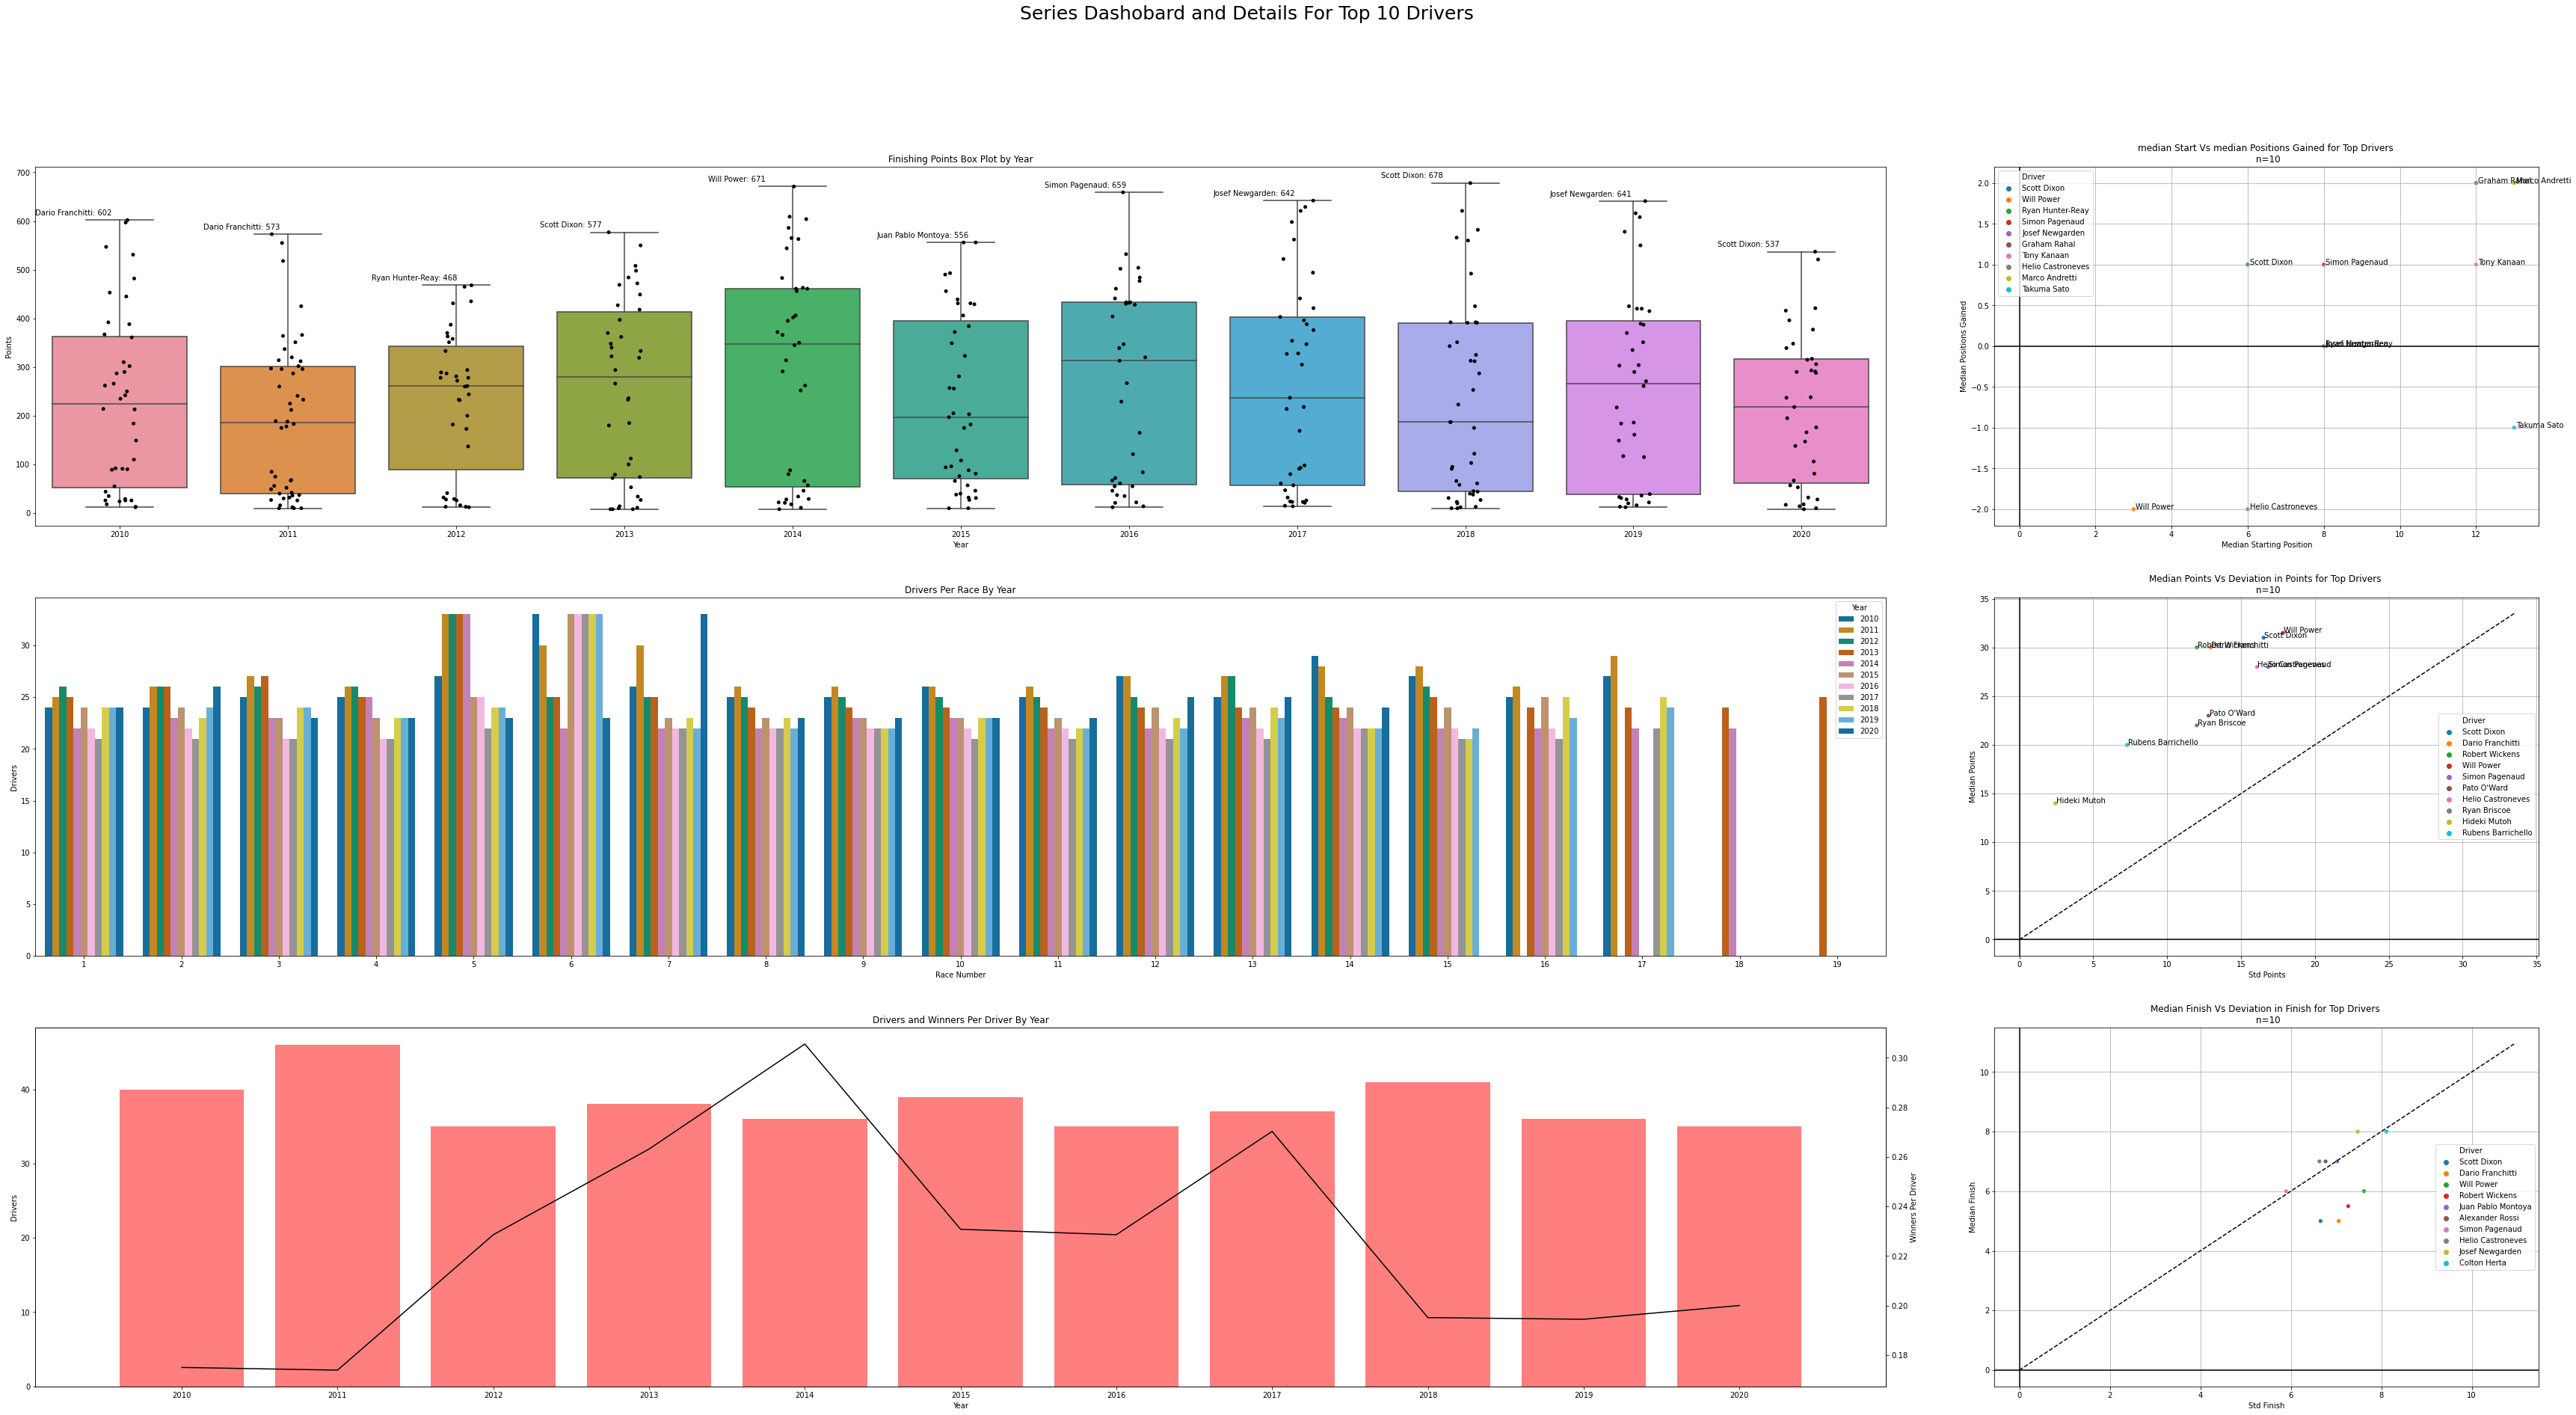

In [45]:
driversForDashboard = ['Will Power', 'Alexander Rossi', 'Colton Herta', 'Dario Franchitti', 'Scott Dixon', 'Josef Newgarden']
summaryStat='median'
for driver in driversForDashboard:
    driverDashboard(driver, summaryStat)

indyCarDashboard(10, summaryStat)
